<a href="https://colab.research.google.com/github/andhiyaulhaq/tomato-leaf/blob/main/Tomatos_Deseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0


In [ ]:
!pip install keras

In [ ]:
#importation des bilbliothèques

import os
import numpy as np
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt
import cv2
import sys
import requests
import zipfile
import gdown
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
import pickle
from tqdm import tqdm
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sn
from keras.layers import Dense, Flatten
#from PIL import Image
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download our dataset from Google Drive using the download link. The dataset is public.
!gdown --id 10jQXkCMtMmqR6breeaWctN6tT-lYdaLV

# Unzip the downloaded file
!unzip TomatoDS.zip -d '/content/Data'

# Delete the zipped file
!rm -r /content/TomatoDS.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/Tomato___Leaf_Mold/d2c889b0-0223-4e09-9d9f-cdf019b65120___Crnl_L.Mold 8631.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d31448f3-312d-4f30-bb39-c1045b1df616___Crnl_L.Mold 6807.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d33d8470-d090-474b-8c16-cd5e88d40f51___Crnl_L.Mold 6998.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d3f5e817-d531-4f9b-ac58-a9bf80518f85___Crnl_L.Mold 8988.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d3fa9514-82c8-4760-a810-7e7b617f3bb8___Crnl_L.Mold 7148.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d47ea382-40cb-4126-a2bc-6578c30f9b78___Crnl_L.Mold 6801.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d49623e2-8d48-480e-8bd1-c7f7b997514c___Crnl_L.Mold 8676.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d4becf38-57b1-46c6-9dbe-fcb747edd287___Crnl_L.Mold 7134.JPG  
  inflating: /content/Data/Tomato___Leaf_Mold/d51c5c7e-feb1-46b2-b5c9-05b9b742bf16___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = 200
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [ ]:
# Load the image dataset from the specified directory, shuffling the data and resizing images
images_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 8913 files belonging to 10 classes.


In [ ]:
class_names=images_dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
# Print the size of our dataset, which corresponds to the number of batches in our dataset
len(images_dataset)

279

In [ ]:
279*32

8928

In [ ]:
# We explore our dataset by displaying the shape of a batch and the numerical label values of the different classes in our dataset
for image_batch, label_batch in images_dataset.take(2):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 200, 200, 3)
[2 7 5 2 5 4 9 0 2 1 8 3 3 9 4 6 5 9 1 7 2 8 3 5 5 3 7 3 2 0 5 5]
(32, 200, 200, 3)
[6 9 8 1 5 7 4 7 0 9 4 7 4 6 7 8 7 4 7 7 3 1 1 2 1 0 4 9 6 9 9 7]


In [ ]:
# Display the first image of this batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())

[[[131.3808   142.3808   174.3808  ]
  [132.       143.       175.      ]
  [132.504    143.504    175.504   ]
  ...
  [ 61.014004  76.61398  118.27594 ]
  [ 61.0448    78.5436   123.48241 ]
  [ 60.7812    78.7616   126.2016  ]]

 [[133.7      144.7      176.7     ]
  [132.4872   143.4872   175.4872  ]
  [131.00601  142.00601  174.00601 ]
  ...
  [ 60.008045  75.06203  113.58198 ]
  [ 59.88361   76.04361  118.18721 ]
  [ 65.627205  83.0084   127.46841 ]]

 [[135.462    146.462    178.462   ]
  [132.86601  143.86601  175.86601 ]
  [129.41     140.41     172.41    ]
  ...
  [ 61.09007   74.480064 108.160034]
  [ 58.782005  72.78801  109.85401 ]
  [ 69.28801   84.104004 124.02401 ]]

 ...

 [[113.86     131.86     167.86    ]
  [113.       131.       167.      ]
  [112.79001  130.79001  166.79001 ]
  ...
  [ 76.46013   86.46013  122.46013 ]
  [ 70.714005  80.714005 116.714005]
  [ 74.64403   84.64403  120.64403 ]]

 [[113.86     131.86     167.86    ]
  [112.7564   130.7564   166.7564  ]


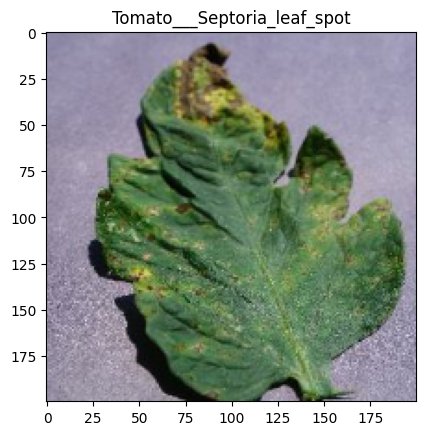

In [ ]:
# Visualize the first image of this batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('on')

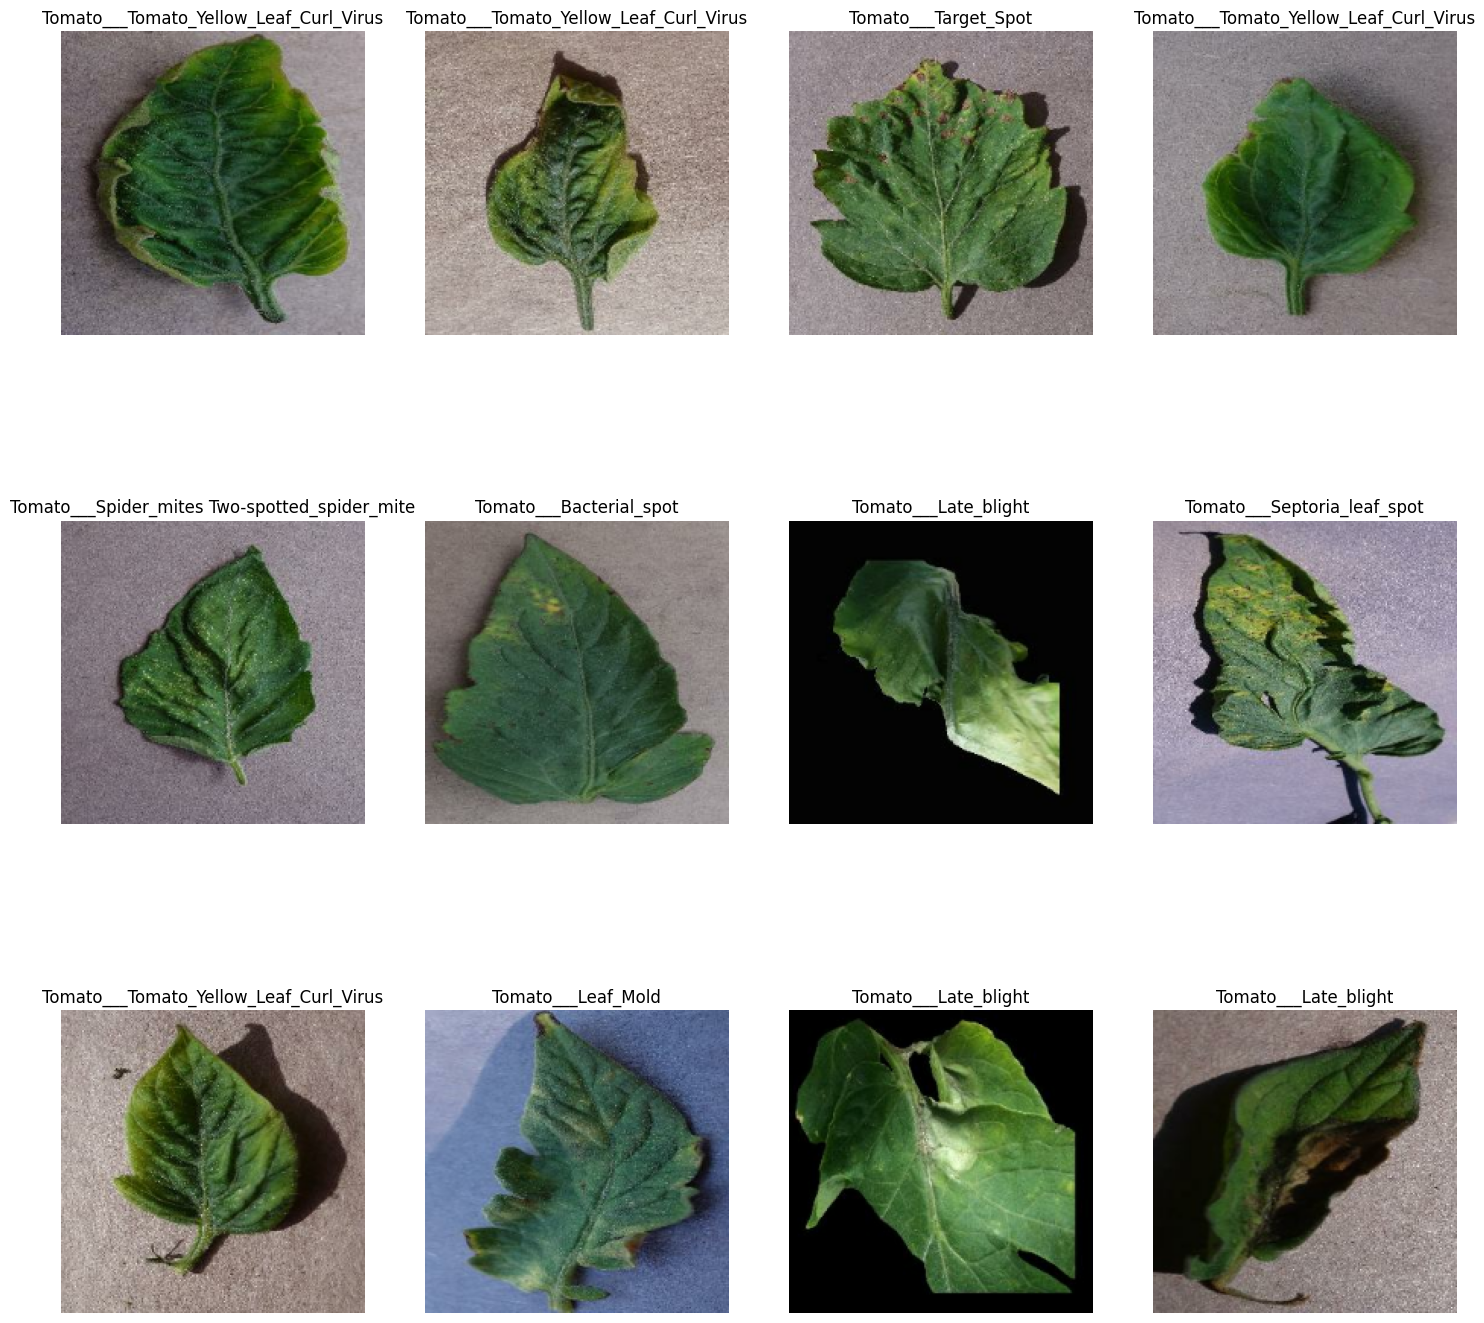

In [ ]:
# Visualize the first few images of this batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
# Function to split our dataset into training, validation, and test data
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [ ]:
print(len(train_ds),len(val_ds),len(test_ds))

223 27 29


In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
#construction du model
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=10
model=models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
#get the summary of ftp
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (32, 200, 200, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 198, 198, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 99, 99, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 97, 97, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 48, 48, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 46, 46, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 23, 23, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 21, 21, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 10, 10, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 8, 8, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 4, 4, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 2, 2, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,914 (671.54 KB)

 Trainable params: 171,914 (671.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
# Model training
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.2854 - loss: 1.9994 - val_accuracy: 0.4769 - val_loss: 1.4633
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5309 - loss: 1.3280 - val_accuracy: 0.5891 - val_loss: 1.0876
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7092 - loss: 0.8376 - val_accuracy: 0.7650 - val_loss: 0.6474
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7980 - loss: 0.5871 - val_accuracy: 0.8507 - val_loss: 0.4196
Epoch 5/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8435 - loss: 0.4599 - val_accuracy: 0.8773 - val_loss: 0.3540
Epoch 6/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8567 - loss: 0.4084 - val_accuracy: 0.8981 - val_loss: 0.3016
Epoch 7/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8824 - loss: 0.3499 - val_accuracy: 0.8958 - val_loss: 0.2784
Epoch 8/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9094 - loss: 0.2712 - val_a

In [ ]:
#evaluate the model
scores = model.evaluate(test_ds)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9844 - loss: 0.0688


In [ ]:
scores

[0.10761948674917221, 0.9802847504615784]

In [ ]:
history

In [ ]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 223}


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
len(history.history['accuracy'])

50

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

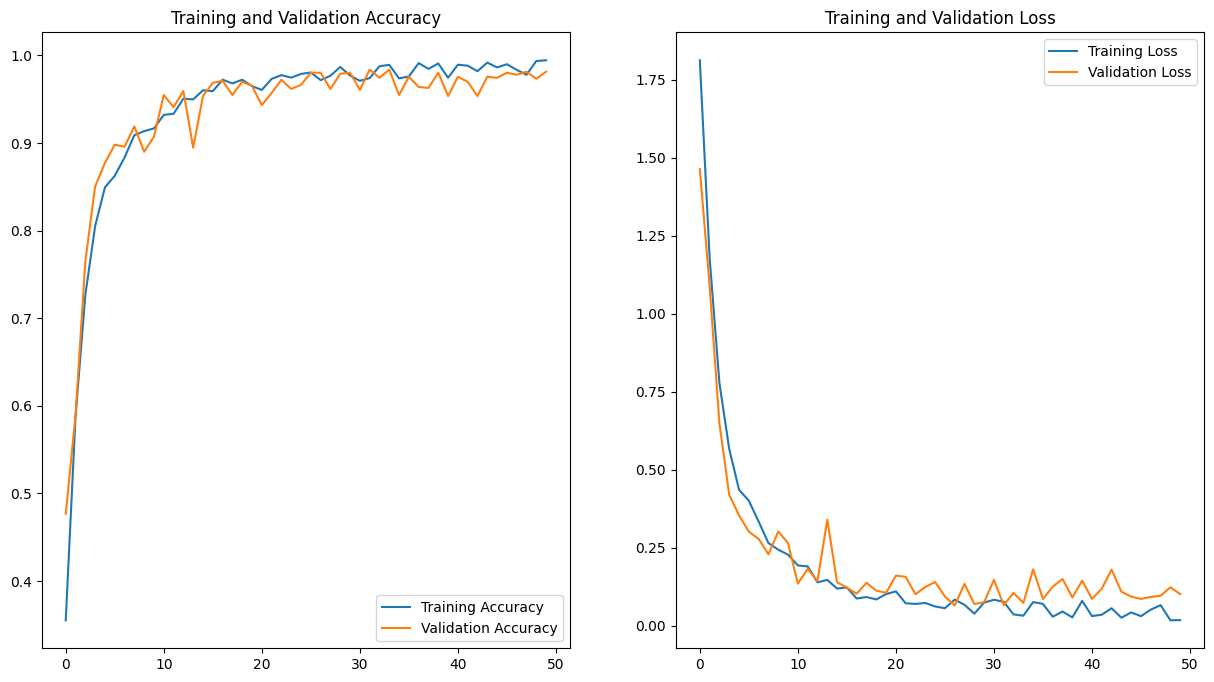

In [ ]:
#Plotting Accuracing and Loss Graph for Trained Model using Matplotlib with history call back
#plotting training and validation accuracy
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
# Save the model in the native Keras format (recommended)
model.save('simple_nn.keras')  # Replace 'simple_nn.keras' with your desired filename

# Load the saved model
loaded_model = tf.keras.models.load_model('simple_nn.keras')  # Update filename if needed

Predicting the first image
Image1 True label: Tomato___Leaf_Mold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Image1's predicted label: Tomato___Leaf_Mold
Accuracy for this batch: 1.0


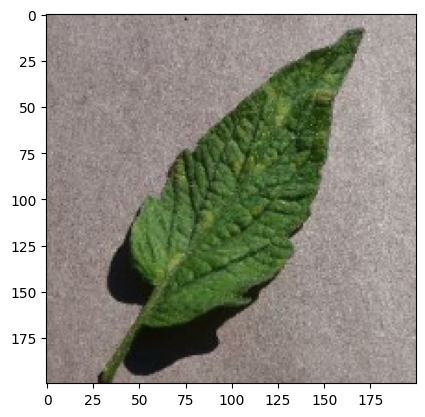

In [ ]:
# Make predictions
for images_batch, label_batch in test_ds.take(1):
    image1 = images_batch[0].numpy().astype('uint8')
    label1 = label_batch[0].numpy()

    print('Predicting the first image')
    plt.imshow(image1)
    print('Image1 True label:', class_names[label1])

    batch_prediction = loaded_model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[0])
    print("Image1's predicted label:", class_names[predicted_label])

    # Calculate accuracy for this batch
    accuracy = np.mean(np.equal(label_batch, np.argmax(batch_prediction, axis=1)))
    print("Accuracy for this batch:", accuracy)

Predicting the first image
Image1 True label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Image1's predicted label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Accuracy for this batch: 1.0


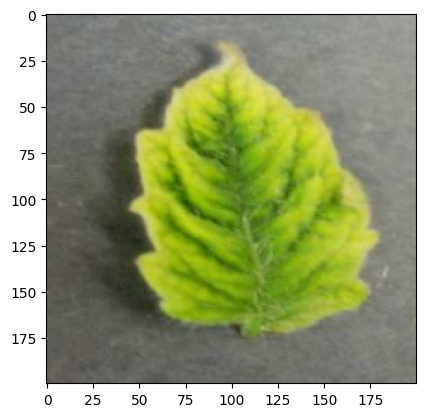

In [ ]:
# Making predictions
for images_batch, label_batch in test_ds.take(1):
    image1 = images_batch[0].numpy().astype('uint8')
    label1 = label_batch[0].numpy()

    print('Predicting the first image')
    plt.imshow(image1)
    print('Image1 True label:', class_names[label1])

    batch_prediction = model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[0])
    print("Image1's predicted label:", class_names[predicted_label])

    # Calculate accuracy for this batch
    accuracy = np.mean(np.equal(label_batch, np.argmax(batch_prediction, axis=1)))
    print("Accuracy for this batch:", accuracy)

In [ ]:
#function to predict with confidence
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


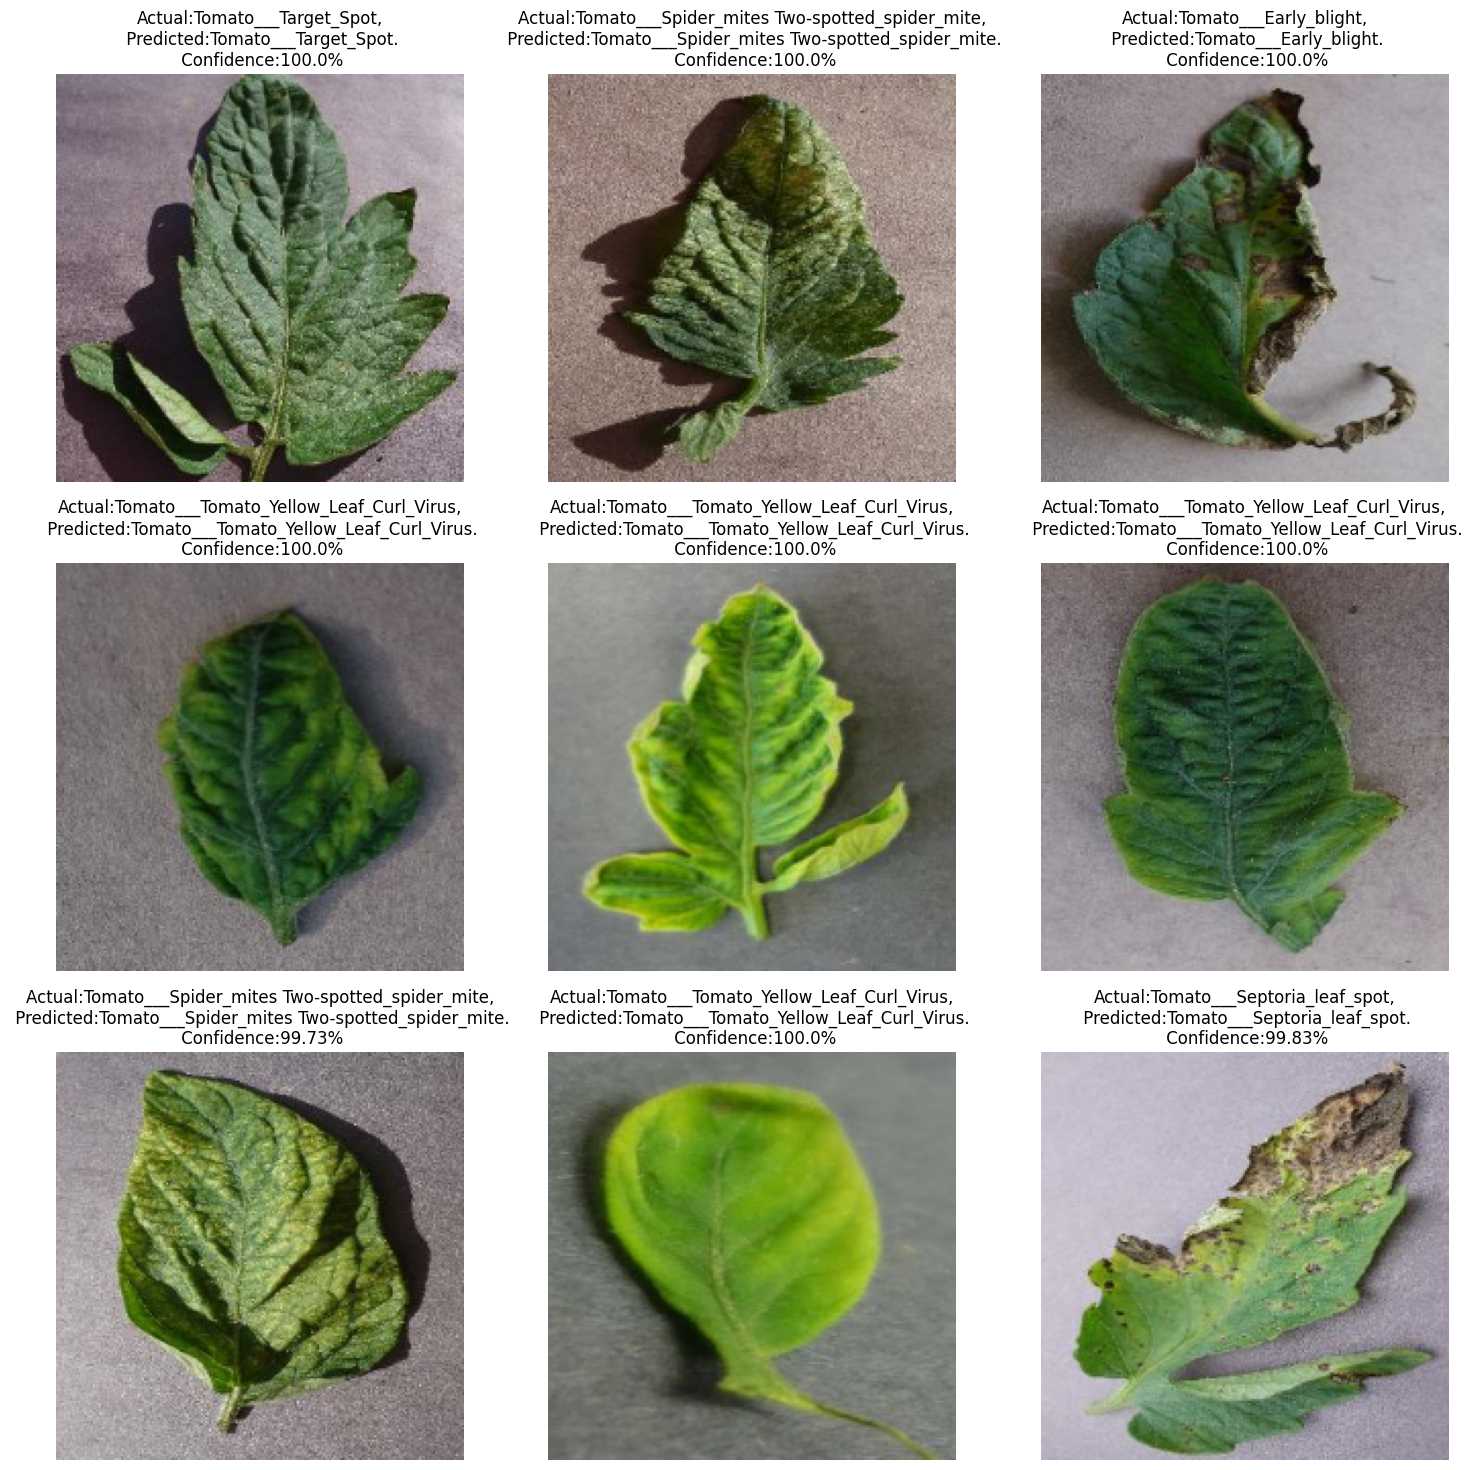

In [ ]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #print(images[0].shape)
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


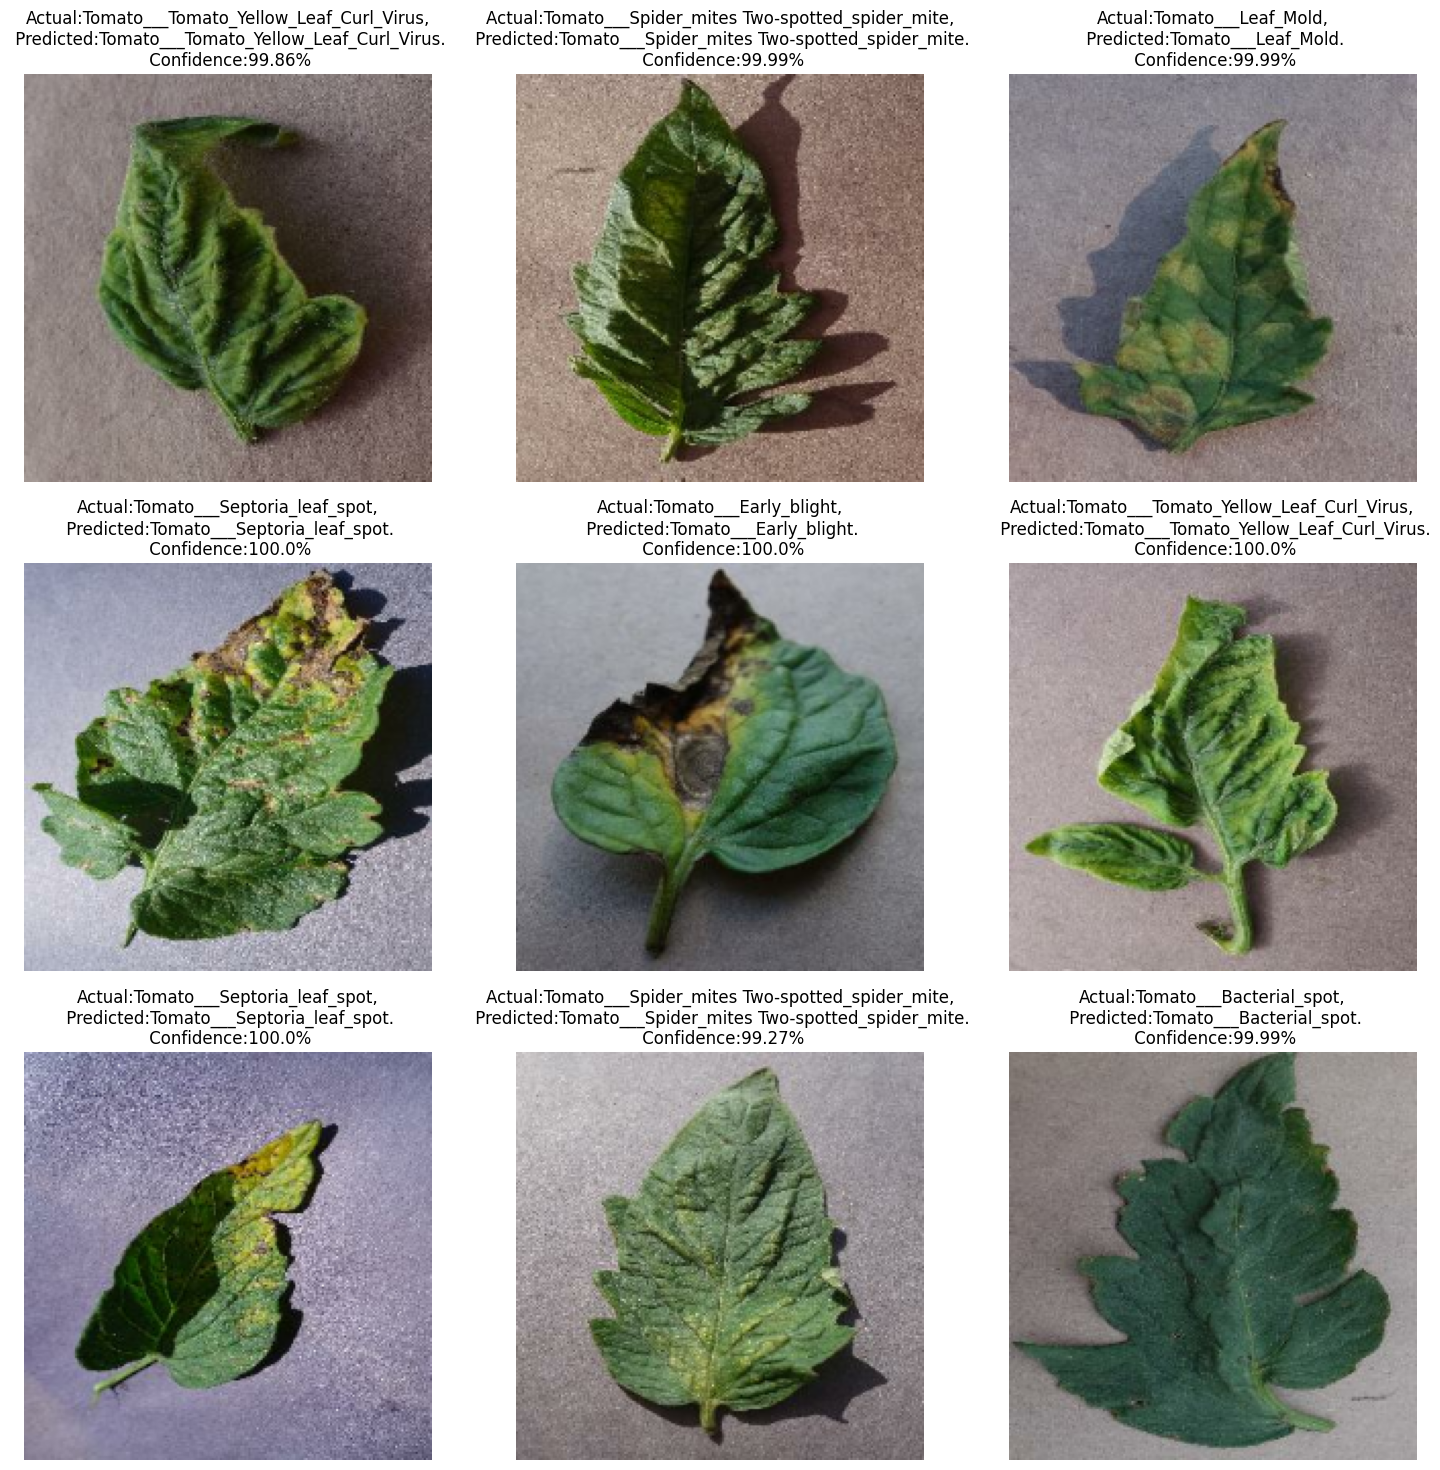

In [ ]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #print(images[0].shape)
        predicted_class,confidence=predict(loaded_model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")